In [2]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

In [3]:
# Из данных есть:
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 1600 евро
# ----- ноябрь 2018 - 1550 евро
# ----- февраль 2019 - 1600 евро

# Котировки нефти, курс eur/usd
dbc = pd.read_excel('cur_oil.xlsx')

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [ ]:
# Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). 
Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [4]:
# customers
# ----- октябрь 2018 - 1600 евро
# ----- ноябрь 2018 - 1550 евро
# ----- февраль 2019 - 1600 евро
# dbc

#Выгружаем данные по 3-м месяцам (для анализа).

oct_2018 = dbc[(dbc['Date']>='2018-10-01')&(dbc['Date']<='2018-10-31')]
nov_2018 = dbc[(dbc['Date']>='2018-11-01')&(dbc['Date']<='2018-11-30')]
feb_2019 = dbc[(dbc['Date']>='2019-02-01')&(dbc['Date']<='2019-02-28')]

# Убираем пропущенные значения: ставим прерыдущее заполненное вместо NaN либо выполняем интерполяцию 
# (2-ой метод предпочтительнее)

# nov_2018['OIL'] = nov_2018.OIL.fillna(method='ffill')
# feb_2019['OIL'] = feb_2019.OIL.fillna(method='ffill')

oct_2018 = oct_2018.set_index('Date')
nov_2018 = nov_2018.set_index('Date')
nov_2018 = nov_2018.interpolate(method='time')
feb_2019 = feb_2019.set_index('Date')
feb_2019 = feb_2019.interpolate(method='time')
# feb_2019 = feb_2019.reset_index()

# Цена на нефть (среднее)
oct_oil_mean = oct_2018.OIL.mean()
nov_oil_mean = nov_2018.OIL.mean()
feb_oil_mean = feb_2019.OIL.mean()

# Курс евро к доллару (среднее)
oct_EURUSD_mean = oct_2018['EURUSD=X'].mean()
nov_EURUSD_mean = nov_2018['EURUSD=X'].mean()
feb_EURUSD_mean = feb_2019['EURUSD=X'].mean()

# price_prod_A_mean
price_oct_eur = ((oct_oil_mean/oct_EURUSD_mean)*16)+PRODUCTION_COST+EU_LOGISTIC_COST_EUR
price_nov_eur = ((nov_oil_mean/nov_EURUSD_mean)*16)+PRODUCTION_COST+EU_LOGISTIC_COST_EUR
price_feb_eur = ((feb_oil_mean/feb_EURUSD_mean)*16)+PRODUCTION_COST+EU_LOGISTIC_COST_EUR
# Цена с учётом доставки для Европы (30 евро)
price_eur_A = [price_oct_eur,price_nov_eur,price_feb_eur]
price_oct_china = ((oct_oil_mean/oct_EURUSD_mean)*16)+PRODUCTION_COST+(CN_LOGISTIC_COST_USD/oct_EURUSD_mean)
price_nov_china = ((nov_oil_mean/nov_EURUSD_mean)*16)+PRODUCTION_COST+(CN_LOGISTIC_COST_USD/nov_EURUSD_mean)
price_feb_china = ((feb_oil_mean/feb_EURUSD_mean)*16)+PRODUCTION_COST+(CN_LOGISTIC_COST_USD/feb_EURUSD_mean)
# Цена с учётом доставки для Китая (130 долларов)
price_china_A = [price_oct_china,price_nov_china,price_feb_china] 

# price_oct 1450 1533
# price_nov 1255 1340
# price_feb 1228 1313

# feb_2019

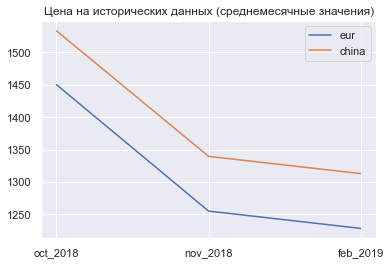

In [5]:
# Цена на исторических данных (среднемесячные значения) с учётом доставки
# price_eur_A #цена для Европы (продукт А)
plt.title('Цена на исторических данных (среднемесячные значения)')
plt.plot(['oct_2018','nov_2018','feb_2019'], price_eur_A)
plt.plot(['oct_2018','nov_2018','feb_2019'], price_china_A)
plt.legend(labels=['eur','china'])
plt.show()


Добавляем новый столбец. в котором будет указана цена продукта (без учёта доставки) в ЕВРО.

In [6]:
oct_2018['base_cost'] = ((oct_2018.OIL/oct_2018['EURUSD=X'])*16)+PRODUCTION_COST
nov_2018['base_cost'] = ((nov_2018.OIL/nov_2018['EURUSD=X'])*16)+PRODUCTION_COST
feb_2019['base_cost'] = ((feb_2019.OIL/feb_2019['EURUSD=X'])*16)+PRODUCTION_COST
oct_2018['base_cost'] = oct_2018.base_cost.round(decimals=2)
nov_2018['base_cost'] = nov_2018.base_cost.round(decimals=2)
feb_2019['base_cost'] = feb_2019.base_cost.round(decimals=2)
# oct_2018
agg_data = pd.concat([oct_2018, nov_2018, feb_2019], ignore_index=False)
agg_data

,EURUSD=X,OIL,base_cost
Date,,,
2018-10-01,1.1605,78.15,1477.47
2018-10-02,1.1578,77.75,1474.45
2018-10-03,1.1552,79.07,1495.15
2018-10-04,1.1476,77.04,1474.10
2018-10-05,1.1518,77.02,1469.91
...,...,...,...
2019-02-22,1.1343,58.65,1227.29
2019-02-25,1.1342,56.80,1201.27
2019-02-26,1.1368,57.04,1202.81


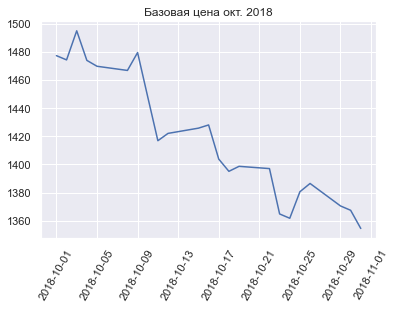

In [7]:
plt.plot(oct_2018.index, oct_2018.base_cost)
plt.title('Базовая цена окт. 2018')
plt.xticks(rotation=60)
plt.show()

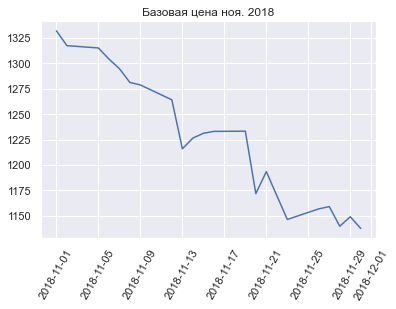

In [8]:
plt.plot(nov_2018.index, nov_2018.base_cost)
plt.title('Базовая цена ноя. 2018')
plt.xticks(rotation=60)
plt.show()

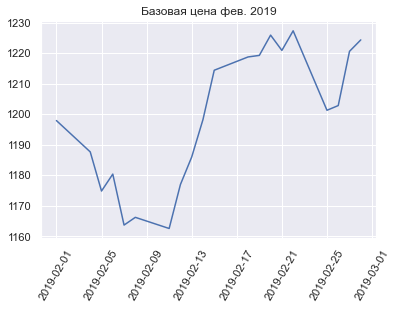

In [9]:
plt.plot(feb_2019.index, feb_2019.base_cost)
plt.title('Базовая цена фев. 2019')
plt.xticks(rotation=60)
plt.show()

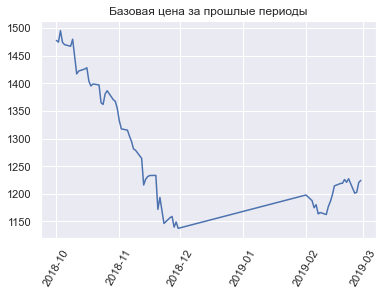

In [10]:
plt.plot(agg_data.index, agg_data.base_cost)
plt.title('Базовая цена за прошлые периоды')
plt.xticks(rotation=60)
plt.show()

In [51]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'comment': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'comment': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'comment': 'monthly'}}

In [52]:
discounts

{'up to 100': 0.01, 'up to 300': 0.05, '300 plus': 0.1}

In [ ]:
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). 
Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

Создаём таблицу, которая содержит все данные. Получаем усреднённые значения на данных за последние 5 месяцев.

In [11]:
all_data = dbc
all_data = all_data.set_index('Date')
all_data = all_data.interpolate(method='time')
# all_data
all_data['base_cost'] = ((all_data.OIL/all_data['EURUSD=X'])*16)+PRODUCTION_COST
all_data['deliver_CN'] = CN_LOGISTIC_COST_USD/all_data['EURUSD=X']
all_data = all_data.reset_index()
all_data_5_month = all_data[(all_data['Date']>='2018-12-01')&(all_data['Date']<='2019-04-30')]
# all_data_5_month
oil_mean_for_5_month = all_data_5_month.OIL.mean() #средняя цена на нефть в $
EURUSD_mean_for_5_month = all_data_5_month['EURUSD=X'].mean() #среднее значение отношения курса ЕВРО к курсу USD
PROFIT = 50 # наш гарантированный доход в 50 ЕВРО с заказа
one_=(oil_mean_for_5_month/EURUSD_mean_for_5_month)*16+PRODUCTION_COST  # Стоимость производства одной тонны про
one_ = round(one_, ndigits=2)

In [101]:
def price(client, location, volume):
    if location == 'EU':
        add_price = EU_LOGISTIC_COST_EUR
    if location == 'CN':
        add_price = CN_LOGISTIC_COST_USD/EURUSD_mean_for_5_month
    if volume <= 100:
        disc = 1-discounts.get('up to 100')
    elif volume > 100 and volume <= 300:
        disc = 1-discounts.get('up to 300')
    else:
        disc = 1-discounts.get('300 plus')
    
    end_price =  ((volume*(one_+add_price))*disc)+PROFIT
    
    end_price = round(end_price, ndigits=2)
    to_excel_ = pd.DataFrame({'Client': client,'Location': location, 'Volume': volume, 'Price_with_disc': end_price, 'Price_for_one': round(end_price/volume, ndigits=2) }, index=[0])
    print(to_excel_)
    to_excel_.to_excel(writer, sheet_name=str(client), index=False)

writer = pd.ExcelWriter('price_with_delivery.xlsx', engine='xlsxwriter')

for customer in customers:
    cli = customer
    loc = customers[customer]['location']
    vol = customers[customer]['volumes']
    comm = customers[customer]['comment']
    price(cli, loc, vol)

writer.save()

  Client Location  Volume  Price_with_disc  Price_for_one
0  Monty       EU     200         234538.5        1172.69
     Client Location  Volume  Price_with_disc  Price_for_one
0  Triangle       CN      30         39217.46        1307.25
  Client Location  Volume  Price_with_disc  Price_for_one
0  Stone       EU     150        175916.38        1172.78
  Client Location  Volume  Price_with_disc  Price_for_one
0   Poly       EU      70          85576.6        1222.52


In [1]:
import os
os.mkdir('customer_offers')

In [15]:
def price(client, location, volume):
    writer = pd.ExcelWriter('customer_offers/'+client+'.xlsx', engine='xlsxwriter')
    if location == 'EU':
        add_price = EU_LOGISTIC_COST_EUR
    if location == 'CN':
        add_price = CN_LOGISTIC_COST_USD/EURUSD_mean_for_5_month
    if volume <= 100:
        disc = 1-discounts.get('up to 100')
    elif volume > 100 and volume <= 300:
        disc = 1-discounts.get('up to 300')
    else:
        disc = 1-discounts.get('300 plus')
    
    end_price =  ((volume*(one_+add_price))*disc)+PROFIT
    
    end_price = round(end_price, ndigits=2)
    to_excel_ = pd.DataFrame({'Client': client,'Location': location, 'Volume': volume, 'Price_with_disc': end_price, 'Price_for_one': round(end_price/volume, ndigits=2) }, index=[0])
    print(to_excel_)
    to_excel_.to_excel(writer, sheet_name=str(client), index=False)
    writer.save()


for customer in customers:
    cli = customer
    loc = customers[customer]['location']
    vol = customers[customer]['volumes']
    comm = customers[customer]['comment']
    price(cli, loc, vol)

# writer.save()

  Client Location  Volume  Price_with_disc  Price_for_one
0  Monty       EU     200         234538.5        1172.69
     Client Location  Volume  Price_with_disc  Price_for_one
0  Triangle       CN      30         39217.46        1307.25
  Client Location  Volume  Price_with_disc  Price_for_one
0  Stone       EU     150        175916.38        1172.78
  Client Location  Volume  Price_with_disc  Price_for_one
0   Poly       EU      70          85576.6        1222.52


# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [ ]:
# 

# Задание 3. Back to Russia

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [ ]:
# 

# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [ ]:
# 

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# import yourpackage

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage